In [6]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

import pandas as pd

In [7]:
input_data = "reviews.csv"
# location of two output files
mode = 'independent_attribute_mode'
description_file = f'description_independent.json'
synthetic_data = f'synthetic_independent.csv'

threshold_value = 20

epsilon = 1
degree_of_bayesian_network = 2
num_tuples_to_generate = 1000 

describer = DataDescriber(category_threshold=threshold_value)
describer.describe_dataset_in_independent_attribute_mode(dataset_file=input_data, 
                                                        epsilon=epsilon, )
describer.save_dataset_description_to_file(description_file)



In [8]:
generator = DataGenerator()
generator.generate_dataset_in_independent_mode(num_tuples_to_generate, description_file)
generator.save_synthetic_data(synthetic_data)


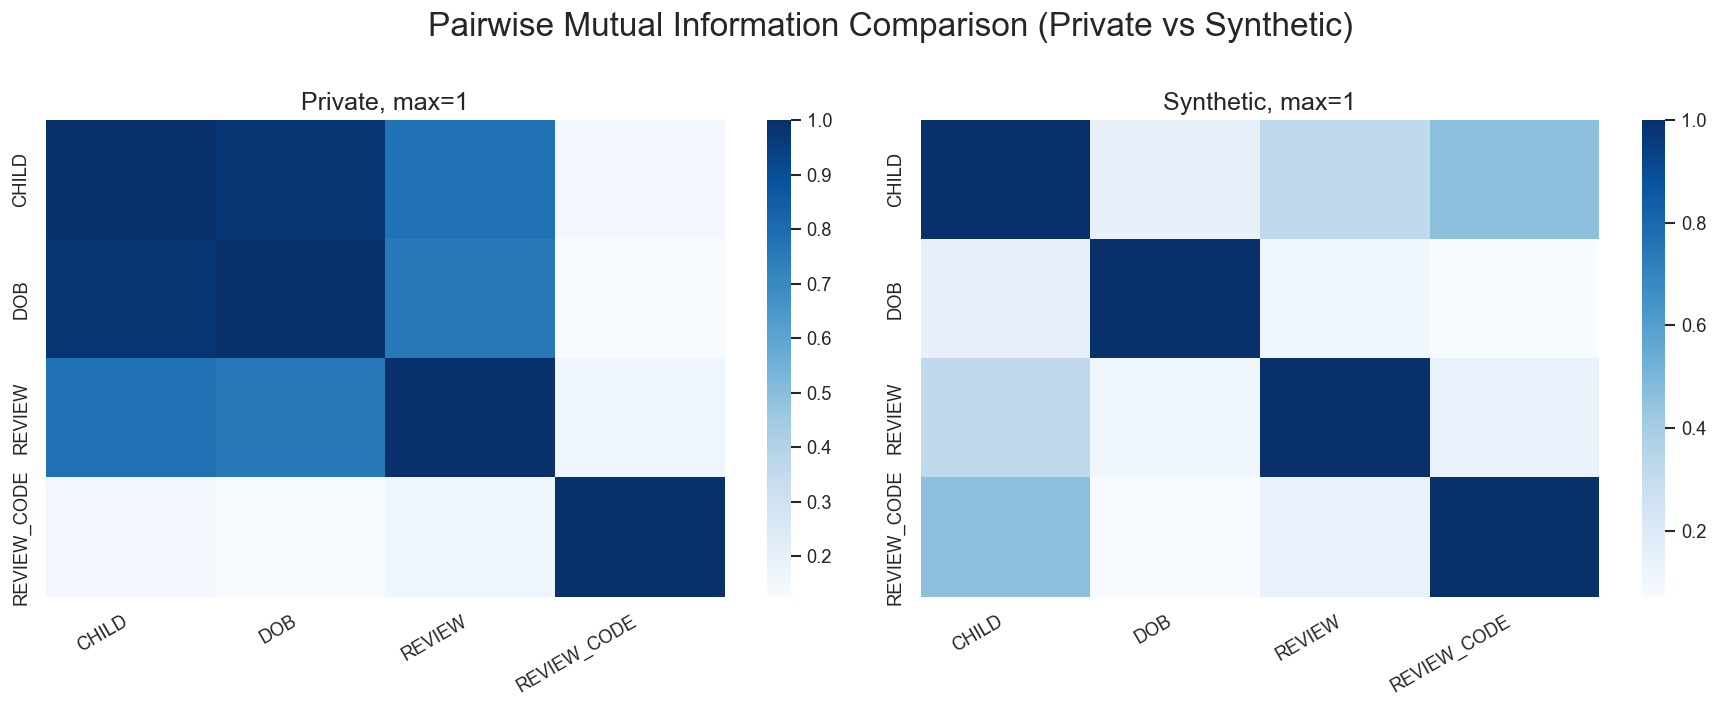

In [9]:
# Read both datasets using Pandas.
input_df = pd.read_csv(input_data, skipinitialspace=True)
synthetic_df = pd.read_csv(synthetic_data)
# Read attribute description from the dataset description file.
attribute_description = read_json_file(description_file)['attribute_description']


inspector = ModelInspector(input_df, synthetic_df, attribute_description)
inspector.mutual_information_heatmap()

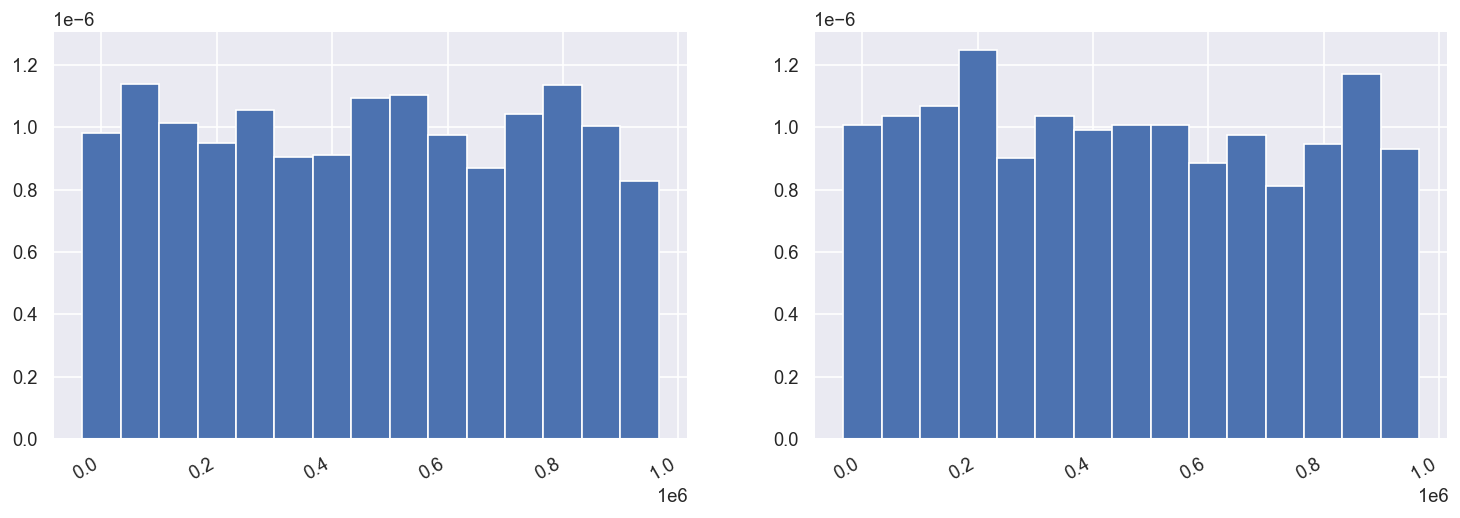

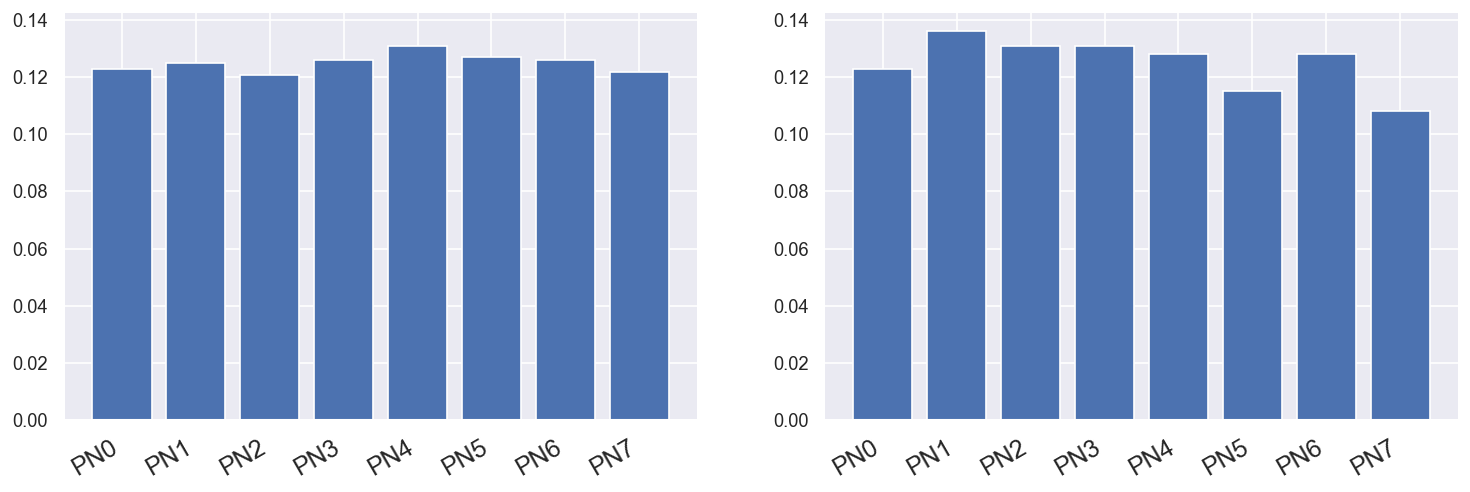

In [10]:
for attribute in synthetic_df.columns:
    inspector.compare_histograms(attribute)